In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/yolo_custom_model_Training'

backup	chart.png  chart_yolov3.png  custom_weight  darknet  images


In [ ]:
!unzip '/content/drive/My Drive/yolo_custom_model_Training/images.zip' -d '/content/drive/My Drive/yolo_custom_model_Training'

Archive:  /content/drive/My Drive/yolo_custom_model_Training/images.zip
   creating: /content/drive/My Drive/yolo_custom_model_Training/images/
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/0.png  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/0.txt  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/1.png  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/1.txt  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/10.png  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/10.txt  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/100.png  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/100.txt  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/101.png  
  inflating: /content/drive/My Drive/yolo_custom_model_Training/images/101.txt  
  inflating: /content/drive/My Drive/yolo_custom_model_T

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/yolo_custom_model_Training/darknet'

Cloning into '/content/drive/My Drive/yolo_custom_model_Training/darknet'...
remote: Enumerating objects: 15308, done.
remote: Counting objects: 100% (15308/15308), done.
remote: Compressing objects: 100% (4582/4582), done.
remote: Total 15308 (delta 10399), reused 15308 (delta 10399), pack-reused 0
Receiving objects: 100% (15308/15308), 13.69 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (10399/10399), done.
Checking out files: 100% (2044/2044), done.


In [ ]:
%cd /content/drive/My Drive/yolo_custom_model_Training/darknet

/content/drive/My Drive/yolo_custom_model_Training/darknet


In [ ]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
#to compile the model
!make

chmod +x *.sh


In [ ]:
%cd /content/drive/My Drive/yolo_custom_model_Training

/content/drive/My Drive/yolo_custom_model_Training


In [ ]:
with open('images/classes.names', 'w') as out:
  out.write('masked\n')
  out.write('not_masked')

with open('images/labelled_data.data', 'w') as out:
  out.write('classes = 2\n')
  out.write('train = images/train.txt\n')
  out.write('valid = images/train.txt\n')
  out.write('names = images/classes.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('images/train.txt', 'w') as out:
  for img in [f for f in os.listdir('images') if f.endswith('png')]:
    out.write('images/' + img + '\n')

In [ ]:
!chmod +x ./darknet/darknet

In [ ]:
!darknet/darknet detector train images/labelled_data.data darknet/cfg/yolov3.cfg backup/yolov3_1000.weights -dont_show

Streaming output truncated to the last 5000 lines.

 3744: 0.175999, 0.328109 avg loss, 0.000010 rate, 2.095836 seconds, 59904 images, 0.315716 hours left
Loaded: 0.000053 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.841881), count: 2, class_loss = 0.002972, iou_loss = 0.027419, total_loss = 0.030391 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.853720), count: 1, class_loss = 0.001369, iou_loss = 0.011450, total_loss = 0.012819 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.837015), count: 3, class_loss = 0.318310, iou_loss = 0.086629, total_loss = 0.404939 
 total_bbox = 115448, rewritten_bbox = 0.022521 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.889530), count: 3, class_loss = 0.000093, iou_loss = 0.019668, total_loss = 0.019762 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.879098), count

In [ ]:
#Testing the model
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load yolo weights and config file within cv2 platform
net=cv2.dnn.readNetFromDarknet('darknet/cfg/yolov3.cfg', 'backup/yolov3_final.weights')

In [ ]:
classes=[]
with open('images/classes.names','r') as f:
    classes=[line.strip() for line in f.readlines()]

In [ ]:
classes

['masked', 'not_masked']

In [ ]:
my_img=cv2.imread('test1.jpg')
my_img=cv2.resize(my_img,(800,800))

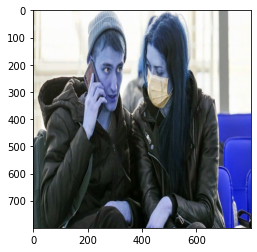

In [ ]:
plt.imshow(my_img)

In [ ]:
my_img.shape

(800, 800, 3)

In [ ]:
ht, wt, _=my_img.shape    #width, height, channel

In [ ]:
#we have the image in the above width height and channel format but darknet/yolo take the image in the different format
#we do that as follows
blob=cv2.dnn.blobFromImage(my_img, 1/255, (416,416), (0,0,0), swapRB= True, crop=False)

In [ ]:
blob.shape

(1, 3, 416, 416)

In [ ]:
#we will feed the above blob to our yolo network. To do it write the following command
net.setInput(blob)

In [ ]:
#to get the output from the newtwork we need to define the last layer of the neural network.Te get the last layer we use,
last_layer=net.getUnconnectedOutLayersNames()
#this will give us the output from the last layer.

In [ ]:
#to get the output from the last layer
layer_out=net.forward(last_layer)

In [ ]:
layer_out

[array([[3.6709256e-02, 6.2686786e-02, 3.6678445e-01, ..., 1.4519728e-06,
         0.0000000e+00, 0.0000000e+00],
        [5.3553049e-02, 5.3906985e-02, 3.5864049e-01, ..., 4.9857857e-07,
         0.0000000e+00, 0.0000000e+00],
        [5.3553060e-02, 5.6580640e-02, 1.3474917e+00, ..., 2.0977700e-06,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [9.5984966e-01, 9.5468861e-01, 3.2544866e-01, ..., 2.4050494e-06,
         0.0000000e+00, 0.0000000e+00],
        [9.5210636e-01, 9.5932686e-01, 2.5553483e-01, ..., 2.2795430e-06,
         0.0000000e+00, 0.0000000e+00],
        [9.4247985e-01, 9.7502065e-01, 9.9626064e-01, ..., 2.5242584e-06,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[1.8482499e-02, 2.5789328e-02, 5.2445456e-02, ..., 6.4062751e-06,
         0.0000000e+00, 0.0000000e+00],
        [1.6974976e-02, 2.3926113e-02, 1.7608824e-01, ..., 5.1051334e-06,
         0.0000000e+00, 0.0000000e+00],
        [2.3515016e-02, 2.4425330e-02, 7.8795232e-02, ...,

In [ ]:
layer_out[0].shape

(507, 7)

In [ ]:
layer_out[0][0]
#the first 5 elements talk about the bounding box. And after these elements we will have the number of classes 
#and their probabilities. If we are concerned about the class, then we should look for the values greater than 0 after 
#5 elements

array([3.6709256e-02, 6.2686786e-02, 3.6678445e-01, 1.1821210e-01,
       1.4519728e-06, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
layer_out[0][0].shape

(7,)

In [ ]:
#so from above cell, we define some of the basics variables as follows
boxes=[]
confidences=[]
class_ids=[]

#we will use the for loop to figure out the bounding boxes, confidence and class ids
for output in layer_out:
    for detection in output:
        score=detection[5:]               #class probabilities are after the 5th element
        class_id=np.argmax(score)         #maximum probability of which class by using argmax function
        confidence=score[class_id]
        
        if confidence>0.6:                     #we don't need low confidence values
            center_x=int(detection[0]*wt)      #we are doing this because detection would be in the range 0 to 1 and we want to
            center_y=int(detection[1]*ht)      #convert it back to normal image size
            w=int(detection[2]*wt)
            h=int(detection[3]*ht)
            
            x=int(center_x-(w/2))
            y=int(center_y-(h/2))
            
            #we got all the values required so lets append our boxes, our confidences and class_ids by .append method
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
#to figure out the bounding boxes out of these values we can utiize following command
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

#once we have defined the indexes we need to give the font
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size= (len(boxes),3))

In [ ]:
indexes
#this will be list of list. so we need to flatten it

array([[0],
       [1]], dtype=int32)

In [ ]:
from google.colab.patches import cv2_imshow

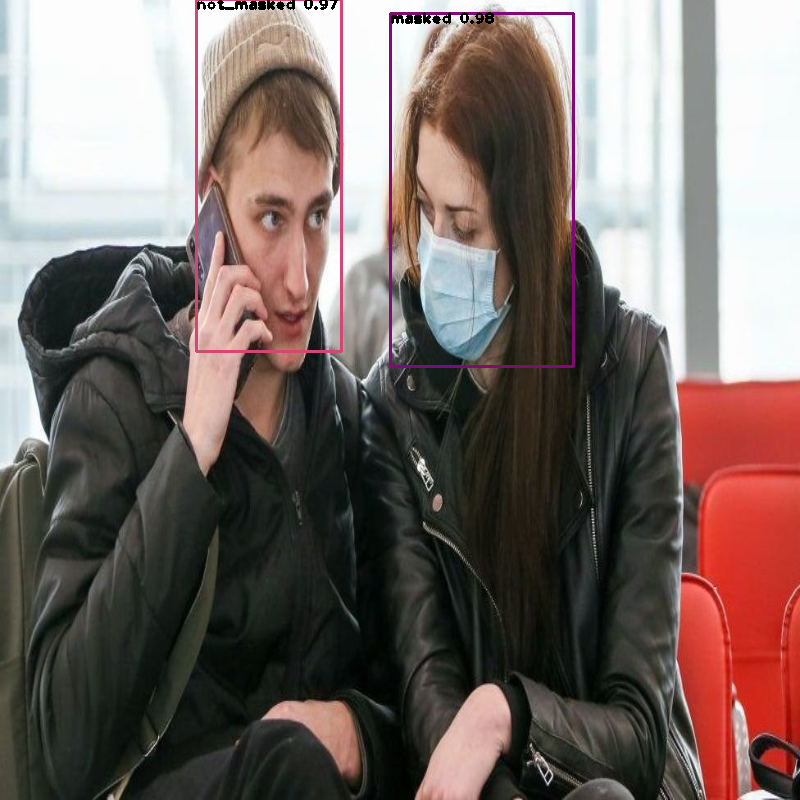

In [ ]:
#now as we have defined the indexes, font and colors this is the time to draw the bounding boxes on top of your image
#for drawing all these boxes we need to loop over indexes
for i in indexes.flatten():
    x,y,w,h=boxes[i]
    label=str(classes[class_ids[i]])            #to get the label. class_ids only gives class id not the class name
    confidence=str(round(confidences[i],2))
    color=colors[i]
    cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_img, label +" "+confidence,(x,y+10),font,1, (0,0,0),2)
    
cv2_imshow(my_img)